# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here
# Write your code here
#PRE PROCESSING
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [802 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,358 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,107 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [61.2 kB]
Hit:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:13 htt

In [2]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Specify Chrome options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

#Extracting the reviews from link
link = 'https://www.imdb.com/title/tt15398776/reviews/?ref_=tt_ql_2'
ta = []
ra = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      ta.append((ele.text).replace('\n',''))
      ra.append(sub_ele.text)
df = pd.DataFrame(list(zip(ta, ra)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 125


,Title,Review
0,"A challenging watch to be sure, but a worthwhi...",
1,Murphy is exceptional,You'll have to have your wits about you and yo...
2,Quality but exhausting,I'm a big fan of Nolan's work so was really lo...
3,A brilliantly layered examination of a man thr...,"""Oppenheimer"" is a biographical thriller film ..."
4,Nolan delivers a powerfull biopic that shows t...,This movie is just... wow! I don't think I hav...
...,...,...
120,Unnecessarily lengthy,"With great expectations, I went to watch this ..."
121,GREAT MOVIE WITH FLAWS,A real winner. I lived through WWII and worked...
122,Overrated,The film failed to deliver on the hype. It is ...
123,Boring and without science,First of all- they left out the science and th...


In [11]:
# Save DataFrame to CSV
print("Reviews saved to file")
df.to_csv('Oppenheimer_reviews.csv', index=False)

Reviews saved to file


In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [13]:
#Converting to Lower Case
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removal of Punctuation
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

#Removal of Special Characters
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

#Removal of Stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Spelling Correction
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

#Tokenization
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('reviews.csv',index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#1.1
import nltk
import itertools
from collections import Counter
def tokenize_text(text):
    return nltk.word_tokenize(text.lower())
tk_reviews = df['Review'].apply(tokenize_text)
# Generate trigrams when N=3
trigrams = list(itertools.chain.from_iterable(nltk.trigrams(tokens) for tokens in tk_reviews))
# Count the frequency of each trigram
tf = Counter(trigrams)
for trigram, freq in tf.items():
    print(f"{trigram}: {freq}")

Streaming output truncated to the last 5000 lines.
('to', 'tell', 'simple'): 1
('tell', 'simple', 'and'): 1
('simple', 'and', 'short'): 1
('and', 'short', 'stories'): 1
('short', 'stories', 'over'): 1
('stories', 'over', 'an'): 1
('over', 'an', 'extremely'): 1
('an', 'extremely', 'extensive'): 1
('extremely', 'extensive', 'period'): 1
('extensive', 'period', ','): 1
(',', 'and', 'to'): 1
('and', 'to', 'tell'): 1
('to', 'tell', 'longer'): 1
('tell', 'longer', 'and'): 1
('longer', 'and', 'more'): 1
('and', 'more', 'complicated'): 1
('more', 'complicated', 'stories'): 1
('complicated', 'stories', 'over'): 1
('stories', 'over', 'a'): 1
('over', 'a', 'short'): 1
('a', 'short', 'period'): 1
('short', 'period', '.'): 1
('period', '.', 'this'): 1
('.', 'this', 'falls'): 1
('this', 'falls', 'into'): 1
('falls', 'into', 'the'): 1
('into', 'the', 'latter'): 1
('the', 'latter', 'category'): 1
('latter', 'category', '.'): 1
('category', '.', 'nothing'): 1
('.', 'nothing', 'is'): 1
('nothing', 'is',

In [16]:
#2. probabilities for all the bigrams in the dataset
from collections import Counter
flat_tokens = list(itertools.chain.from_iterable(tk_reviews))
# Calculate the frequency of all bigrams
bg = nltk.bigrams(flat_tokens)
frequency_dist = nltk.FreqDist(bg)
bg_dict = dict(frequency_dist)
word_counts = Counter(flat_tokens)
# Print the probability of the 2nd word given the 1st word in each bigram
for bigram, freq in bg_dict.items():
    word1, word2 = bigram
    if word_counts[word1] != 0:
        probability = freq / word_counts[word1]
        print(f"{bigram}: {probability}")
    else:
        print(f"Warning: Count of {word1} is zero.")

Streaming output truncated to the last 5000 lines.
('investigators', 'are'): 1.0
('are', 'frantic'): 0.007518796992481203
('frantic', ','): 1.0
(',', 'unfair'): 0.0007434944237918215
('unfair', ','): 0.5
('and', 'evil'): 0.0011363636363636363
('evil', 'attackers'): 0.25
('attackers', 'working'): 1.0
('working', 'outside'): 0.16666666666666666
('outside', 'the'): 0.5
('system', '.'): 0.5
('movie', 'literally'): 0.0049504950495049506
('literally', 'showed'): 0.3333333333333333
('showed', 'us'): 0.5
('a', 'scene'): 0.0014388489208633094
('he', 'lied'): 0.005714285714285714
('lied', 'to'): 1.0
('a', 'state'): 0.0028776978417266188
('state', 'agent'): 1.0
('agent', 'who'): 0.5
('was', 'responsible'): 0.00425531914893617
('for', 'shutting'): 0.004694835680751174
('shutting', 'down'): 0.5
('down', 'leaks'): 0.08333333333333333
('leaks', '.'): 1.0
('imagine', 'what'): 0.14285714285714285
('what', 'would'): 0.0136986301369863
('would', 'happen'): 0.0196078431372549
('happen', 'to'): 0.5
('to', 

In [17]:
#3 Noun Phrases and relative probabilities of each review in terms of other reviews
import nltk
from nltk import pos_tag, RegexpParser
from collections import Counter
import pandas as pd

tr = [nltk.word_tokenize(review.lower()) for review in df['Review']]
# Extract noun phrases using part-of-speech tagging
n_phrases = []
for review_tokens in tr:
    if review_tokens:
        t_tokens = pos_tag(review_tokens)
        g = r'NP: {<DT>?<JJ>*<NN>}'
        chunk_parser = RegexpParser(g)
        tree = chunk_parser.parse(t_tokens)
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                n_phrase = ' '.join(word for word, tag in subtree.leaves())
                n_phrases.append(n_phrase)
# frequency of each noun phrase
npf = Counter(n_phrases)
# Creating a table to store relative frequencies of noun phrases for each review
npt = {}
for i, review in enumerate(df['Review']):
    tokenized_review = nltk.word_tokenize(review.lower())
    review_n_phrases = [n_phrase for n_phrase in n_phrases if n_phrase in tokenized_review]
    review_freq = Counter(review_n_phrases)
    r_freq = {n_phrase: review_freq[n_phrase] / npf[n_phrase] for n_phrase in review_freq}
    npt[f"Review {i+1}"] = r_freq
np_df = pd.DataFrame(npt).fillna(0)
np_df

,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,...,Review 116,Review 117,Review 118,Review 119,Review 120,Review 121,Review 122,Review 123,Review 124,Review 125
brain,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
audience,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
dialogue,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
information,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oppenheimer,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
all-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
exception,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
cc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
blaring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) coll
ected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [28]:
import math
import pandas as pd
s = reviews_df["Review"].values.tolist()
words = set([word for sentence in s for word in sentence.split(" ")])
tf_idf_df = pd.DataFrame(words, columns=["words"])
count = 1
def tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0
for sentence in s:
    tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
    count += 1
tf_idf_df

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review89,Review90,Review91,Review92,Review93,Review94,Review95,Review96,Review97,Review98
0,objective,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"nomination,",0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,outright,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,communist),0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,consequences,0.000000,0.000000,0.00204,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,en,0.079589,0.032381,0.07869,0.053607,0.069737,0.044574,0.04211,0.03101,0.08505,...,0.078406,0.083254,0.029636,0.06178,0.055611,0.051684,0.055662,0.042944,0.077996,0.074345
6362,cinema.,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.017213,0.000000
6363,CPUSA,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6364,artist,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

query = "I am interested in learning about natural language processing techniques and their applications in data and knowledge retrieval. I want to understand how these techniques can be used to analyze text directly, rather than just titles and abstracts. Additionally, I'm curious about the importance of rigor in these approaches."
query_tokens = word_tokenize(query)
stop = set(stopwords.words('english'))
query_words = {word for word in query_tokens if not word in stop}
# Function to calculate the cosine similarity
def cosine_similarity(X, Y):
    intersection = len(X.intersection(Y))
    cosine_sim = intersection / ((len(X) * len(Y)) ** 0.5)
    return cosine_sim
reviews_df = pd.read_csv('Oppenheimer_reviews.csv')
# Calculate cosine similarity with each review
c_similarities = []
for review in reviews_df['Review']:
    if isinstance(review, str):
        review_tokens = word_tokenize(review)
        review_words = {word for word in review_tokens if not word in stop}
        c_similarities.append(cosine_similarity(query_words, review_words))
    else:
        c_similarities.append(0)
# Add cosine similarity to DataFrame
reviews_df['Cosine Similarity'] = c_similarities
rank_review_df = reviews_df.sort_values(by='Cosine Similarity', ascending=False)
rank_review_df['Rank'] = np.arange(1, len(rank_review_df) + 1)
ranked_rd = rank_review_df[['Review', 'Cosine Similarity', 'Rank']]
ranked_reviewsdataframe = pd.DataFrame(ranked_rd)
print("Ranked Reviews based on Similarity to the Query:")
ranked_reviewsdataframe

Ranked Reviews based on Similarity to the Query:


,Review,Cosine Similarity,Rank
119,"A wonderfully crafted film, with a strong cast...",0.136505,1
96,Nolan's best film will be in the biographical ...,0.134987,2
94,If you have an interest in particle physics an...,0.116311,3
21,The film looks great is brilliantly acted but ...,0.112140,4
27,This movie is very interesting and very thrill...,0.106904,5
...,...,...,...
87,NaN,0.000000,121
89,NaN,0.000000,122
12,NaN,0.000000,123
93,NaN,0.000000,124


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [42]:
!pip install gensim

In [43]:
import gensim
from gensim.models import Word2Vec
import pandas as pd

# Load data from CSV from previous assignment
data_url = 'https://raw.githubusercontent.com/Sowmika26/INFO_5731/main/Assignment_2/Oppenheimer_reviews.csv'
df = pd.read_csv(data_url)

# Preprocess the data
corpus = []
for text in df['reviews']:
    tokens = text.split()  # Simple tokenization by splitting on whitespace
    corpus.append(tokens)

# Train the Word2Vec model with 300-dimension vectors
model = Word2Vec(corpus, min_count=1, vector_size=300, window=5, workers=4)
print("Word2Vec model training is completed.")

Word2Vec model training is completed.


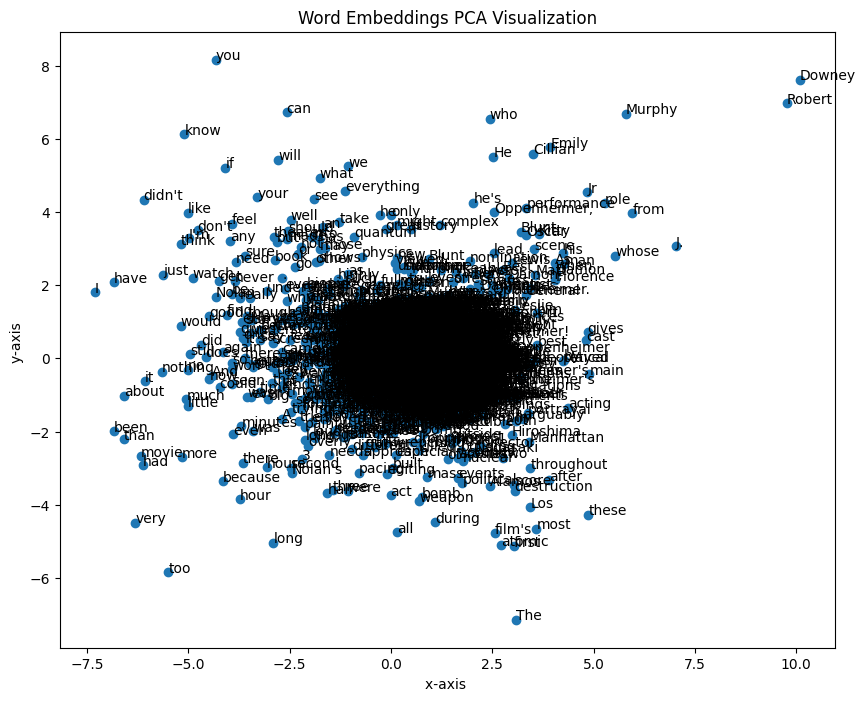

In [45]:
#(2) Visualize the word embedding model you created.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
word_vectors = model.wv
vocab = list(word_vectors.key_to_index)
X = word_vectors[vocab]

# Fitting a 2D PCA model to the word vectors for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Creating the plot of the 2D PCA projection
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Words on the scatter plot
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.xlabel('x-axis ')
plt.ylabel('y-axis ')
plt.title('Word Embeddings PCA Visualization')
plt.show()

## Question 4 (20 Points)
**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [46]:
# The GitHub link of your final csv file


# Link: https://github.com/Sowmika26/INFO_5731/blob/main/annotated_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [47]:
# Type your answer
'''
Implementing N-gram analysis and extracting noun phrases was challenging in this task, which is of data structures and methods. The difficulty, and the hands-on experience provided a deeper understanding of NLP  models.
'''

'\nImplementing N-gram analysis and extracting noun phrases was challenging in this task, which is of data structures and methods. The difficulty, and the hands-on experience provided a deeper understanding of NLP  models.\n'